#**Import libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain, combinations

#**Load Wine Quality data**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8      

##Scale data

In [3]:
# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

##Visualize data

<Figure size 1000x1000 with 0 Axes>

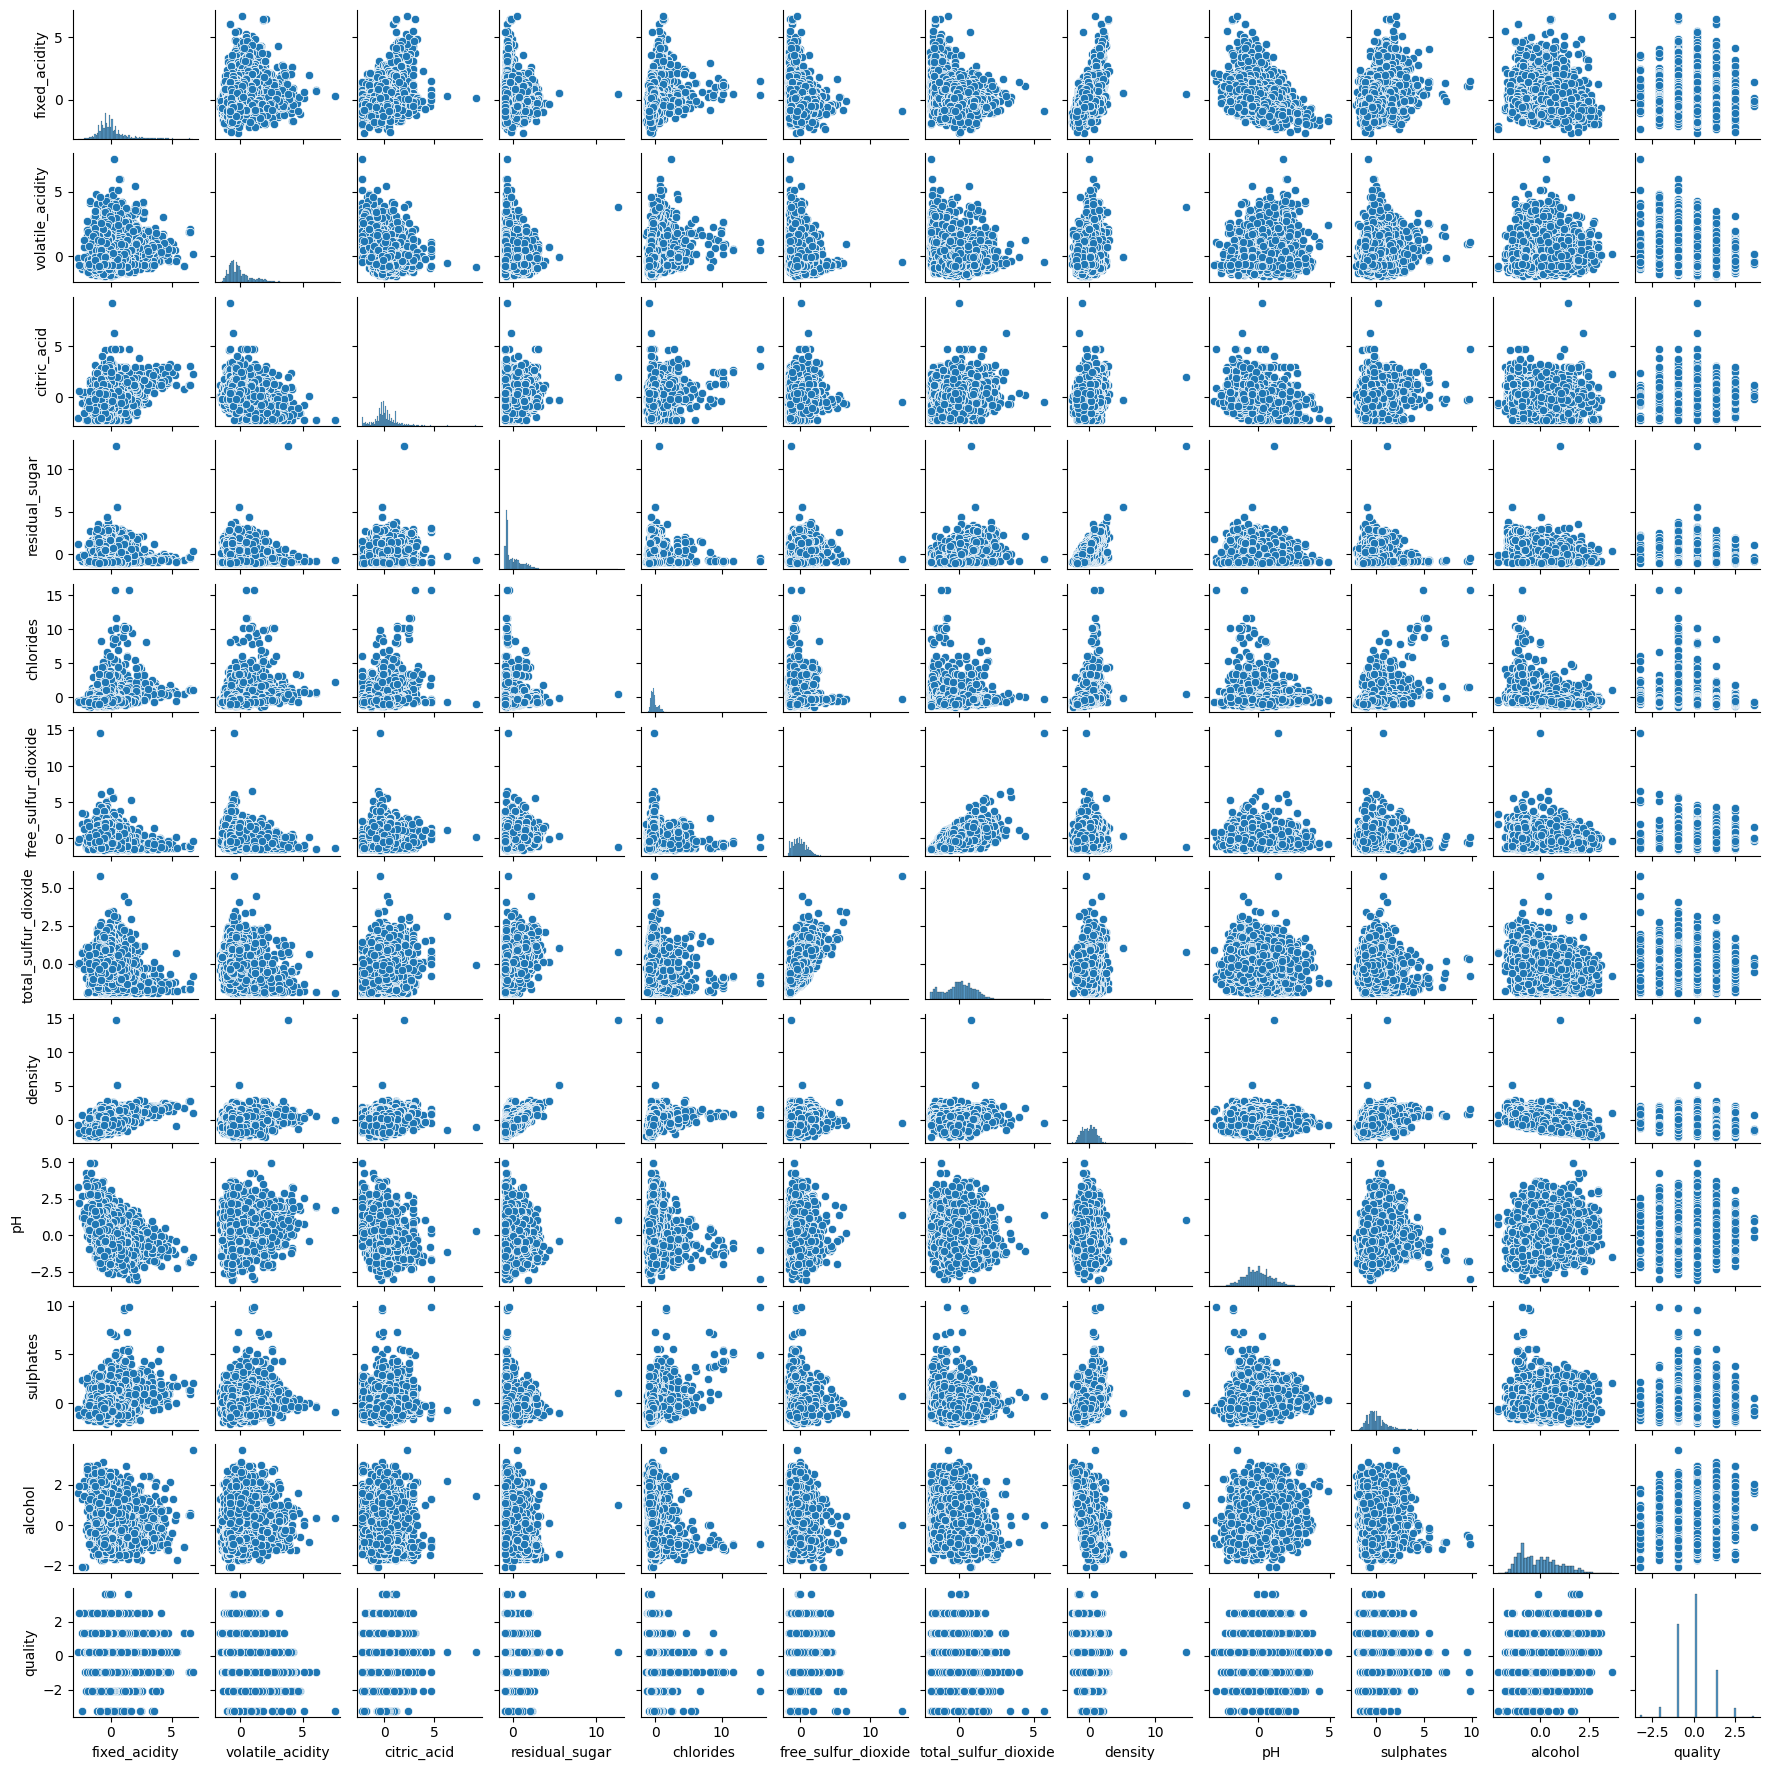

In [4]:
# Plot correlogram
plt.figure(figsize=(10,10))
sns.pairplot(df, height=1.5)
plt.show()

#**Regression**

##Split data

In [5]:
#Extract features and labels
x, y = df.iloc[:,:-3].to_numpy(), df.iloc[:,-2].to_numpy()

#Create training, validation, and test set
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4547, 10)
(975, 10)
(975, 10)


##Grid search on better models

In [6]:
#Power set generator
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
spec = 0
poly = 0

for pow in np.array([1,2,3]):
  for var in powerset(range(X_train.shape[1])):
    if len(var) == 0: # Skip empty set
      continue
    for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
      X_train_md = X_train[:, var]
      y_train_md = y_train
      X_val_md = X_val[:, var]
      y_val_md = y_val
      mdl = make_pipeline(PolynomialFeatures(degree=pow),Ridge(alpha=alpha)).fit(X_train_md,y_train_md)
      print(f"Alpha: {alpha}")
      train_R2 = mdl.score(X_train_md,y_train_md)
      val_R2 = mdl.score(X_val_md,y_val_md)
      print(f"\tCoefficients: {mdl[1].coef_}")
      print(f"\tIntercept: {mdl[1].intercept_}")
      print(f"\tTraining accuracy (R2): {train_R2}")
      print(f"\tValidation accuracy (R2): {val_R2}")
      if val_R2 > max_R2:
          max_R2 = val_R2
          best_alpha = alpha
          best_mdl = mdl
          spec = var
          poly = pow

Streaming output truncated to the last 5000 lines.
 -1.08645696e-02  1.06670916e-02 -2.56919707e-02 -1.94032270e-01
 -1.35013938e-01 -8.17357009e-02  8.87547497e-02  2.46291860e-01
  1.05741808e-02 -4.48113288e-02  1.49064836e-02 -1.16467264e-01
  2.05566360e-01 -1.57049740e-01 -8.19781074e-02  1.64826726e-01
  1.21962959e-01  4.10161873e-03 -6.35842764e-02 -1.38696272e-01
  3.55912944e-02 -1.64353089e-01  2.81154045e-02  2.54357733e-04
 -2.55625391e-02 -3.76557671e-02  2.95302730e-02  2.34070286e-02
 -1.56491732e-04  1.80919014e-02  1.01488362e-02 -3.40098719e-02
 -5.57491562e-03  6.53224197e-02  6.12059298e-02  4.88718015e-02
 -7.23466147e-02 -6.79117829e-04 -4.43685653e-02  8.81401556e-02
 -5.60227578e-02  9.53482849e-02 -7.89457453e-02 -6.68107710e-02
  6.95925247e-02 -1.99191523e-02  2.28612253e-02 -8.18472262e-02
  7.88367449e-02  9.44608620e-03 -4.72719056e-02  3.19545018e-02
 -1.43637566e-01  2.68341304e-03 -6.98484974e-02  1.53155573e-01
 -2.76345168e-02  2.22979175e-02  1.068

##Present best model

Best alpha: 10.0
Specification: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Polynomial degree: 2
Coefficients: [ 0.00000000e+00  2.85894655e-01 -2.34660005e-01  2.91669564e-02
  5.27967713e-01 -6.41848746e-02  1.73267632e-01 -2.13958935e-01
 -7.02019334e-01  1.88622585e-01  1.82820032e-01 -7.12941112e-02
  7.16582145e-02  9.70924091e-02 -5.25596385e-03 -1.04909258e-01
  3.31508410e-03 -4.85916346e-02  2.26346019e-02  2.69082358e-02
  5.30443706e-03  2.73141161e-02  1.64389006e-02  1.26513695e-02
  7.36867903e-03  8.45846534e-04 -6.93981861e-03 -1.31026533e-01
  4.82255036e-02  3.04615339e-02 -2.10082525e-02  5.18609938e-02
  3.47089035e-02  4.47912543e-02  1.55210886e-04 -1.44060197e-01
  3.03210465e-02 -2.87437030e-03 -9.80580085e-02 -1.29593214e-01
 -1.85929095e-02  6.01618746e-02 -3.95263487e-02 -1.64976372e-02
 -4.35767503e-02 -1.04567357e-02 -7.36629404e-04 -2.74642403e-02
  1.34009955e-01 -6.07368601e-02 -3.86090978e-02 -2.67027902e-02
 -4.49165677e-02 -5.39299680e-02  5.24310194e-02  4.01206

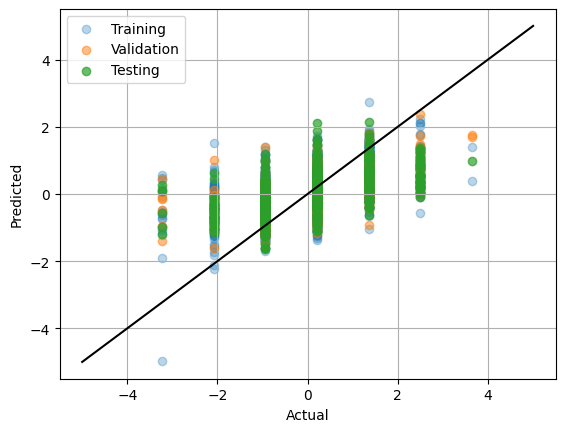

In [7]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Specification: {spec}")
print(f"Polynomial degree: {poly}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")


# Plot the Actual vs. Predicted values
X_test_md = X_test[:,spec]
y_test_md = y_test
X_train_md = X_train[:,spec]
y_train_md = y_train
X_val_md = X_val[:,spec]
y_val_md = y_val

train_R2 = best_mdl.score(X_train_md,y_train_md)
print(f"Training accuracy (R2) of Best Model: {train_R2}")
val_R2 = best_mdl.score(X_val_md,y_val_md)
print(f"Validation accuracy (R2) of Best Model: {val_R2}")
test_R2 = best_mdl.score(X_test_md,y_test_md)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")

y_train_pred = best_mdl.predict(X_train_md)
y_val_pred = best_mdl.predict(X_val_md)
y_test_pred = best_mdl.predict(X_test_md)
plt.plot(np.array([-5, 5]),np.array([-5, 5]),color='k',label='_nolegend_')
plt.scatter(y_train_md, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val_md, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test_md, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

#**Classification**

## Split data

In [8]:
df['wine_code'] = [1 if x == 'red' else 0 for x in df['color']]

#Extract features and labels
x, y = df.iloc[:,:-4].to_numpy(), df.iloc[:,-1].to_numpy()

df['wine_code'] = [1 if x == 'red' else 0 for x in df['color']]

#Extract features and labels
x, y = df.iloc[:,:-4].to_numpy(), df.iloc[:,-1].to_numpy()

#Create training, validation, and test set
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0, stratify=y_2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4547, 10)
(975, 10)
(975, 10)


##Grid search on better models

In [9]:
# Search over different specification values
max_acc = 0
best_alpha = 0
best_mdl = 0
spec = 0
poly = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  for pow in np.array([1,2,3]):
      X_train_md = X_train[:, var]
      y_train_md = y_train
      X_val_md = X_val[:, var]
      y_val_md = y_val
      mdl = make_pipeline(PolynomialFeatures(degree=pow),LogisticRegression(solver='newton-cg', random_state=0,penalty=None)).fit(X_train_md,y_train_md)
      train_acc = mdl.score(X_train_md,y_train_md)
      val_acc = mdl.score(X_val_md,y_val_md)
      print(f"Specification: {var}")
      print(f"\tCoefficients: {mdl[1].coef_}")
      print(f"\tIntercept: {mdl[1].intercept_}")
      print(f"\tTraining accuracy: {train_acc}")
      print(f"\tValidation accuracy: {val_acc}")
      if val_acc > max_acc:
          max_acc = val_acc
          best_alpha = alpha
          best_mdl = mdl
          spec = var
          poly = pow

Streaming output truncated to the last 5000 lines.
	Coefficients: [[-2.19570375  1.38287754 -0.230741   -3.62407583  0.7200772   1.0149054
  -3.69355999  3.4299723 ]]
	Intercept: [-2.19570375]
	Training accuracy: 0.9892236639542555
	Validation accuracy: 0.9897435897435898
Specification: (1, 2, 3, 4, 5, 6, 7)
	Coefficients: [[-2.12043418  1.58124178  0.84624421 -2.75624861  2.05474119  0.61864069
  -5.02136654  2.21633121 -0.21199667  0.06676777 -1.39671878  1.09279085
  -0.6602444  -0.38752205  1.38748154 -0.03715494  0.25672652 -0.08646532
   0.33837584 -0.27267461  1.36083329 -0.91594124 -2.99562977 -2.45592679
   2.2861603   0.88975604 -0.66434846 -1.11670928 -1.12898058  3.77341433
  -0.9318906  -1.17910995  2.06972349  1.71632682 -3.91044014 -0.30778327]]
	Intercept: [-2.12043418]
	Training accuracy: 0.9940620189135694
	Validation accuracy: 0.9876923076923076
Specification: (1, 2, 3, 4, 5, 6, 7)
	Coefficients: [[-13.84785811  41.14948293   5.7986428   20.14841298 -26.35394169
   -

## Present best model

Specification: (1, 3, 5, 6, 7, 9)
Polynomial degree: 2
Coefficients: [[-2.061169    2.04232686 -2.37165383  0.69175086 -4.46752853  2.2160052
   1.38558726 -0.64636781 -1.75576475  0.09036545 -0.93324812  2.44484396
   0.98568786  1.02011597 -1.76832388  2.05293671 -2.05299237 -0.62393668
  -0.60013602 -1.24039378  0.86603318 -0.47140781  1.33951493 -2.29700032
  -0.55262086  0.72655584  0.74548456 -0.342428  ]]
Intercept: [-2.061169]
Training accuracy of Best Model: 0.993842093688146
Validation accuracy of Best Model: 0.9958974358974358
Testing accuracy of Best Model: 0.9907692307692307


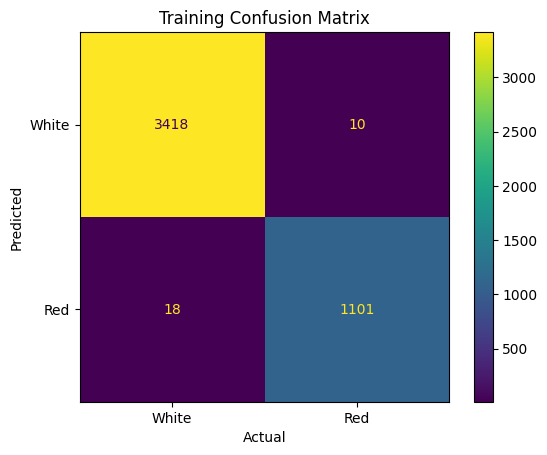

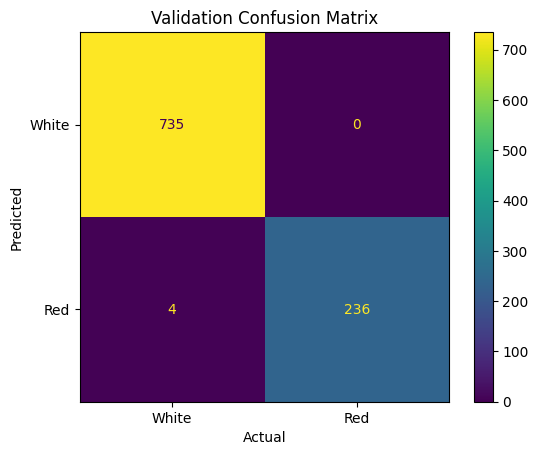

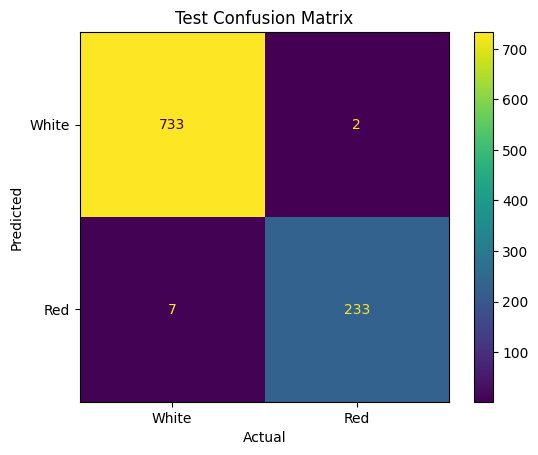

In [10]:
# Print results of the best model
print(f"Specification: {spec}")
print(f"Polynomial degree: {poly}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")


# Plot the Actual vs. Predicted values
X_test_md = X_test[:,spec]
y_test_md = y_test
X_train_md = X_train[:,spec]
y_train_md = y_train
X_val_md = X_val[:,spec]
y_val_md = y_val

train_acc = best_mdl.score(X_train_md,y_train_md)
print(f"Training accuracy of Best Model: {train_acc}")
val_acc = best_mdl.score(X_val_md,y_val_md)
print(f"Validation accuracy of Best Model: {val_acc}")
test_acc = best_mdl.score(X_test_md,y_test_md)
print(f"Testing accuracy of Best Model: {test_acc}")

y_train_pred = best_mdl.predict(X_train_md)
y_val_pred = best_mdl.predict(X_val_md)
y_test_pred = best_mdl.predict(X_test_md)

cfm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["White", "Red"])
cm_display.plot()
plt.title('Training Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

cfm = confusion_matrix(y_val, y_val_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["White", "Red"])
cm_display.plot()
plt.title('Validation Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

cfm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["White", "Red"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()